# 検量線

coef = [[10881.12724766]] 
score = 0.9999634781477846


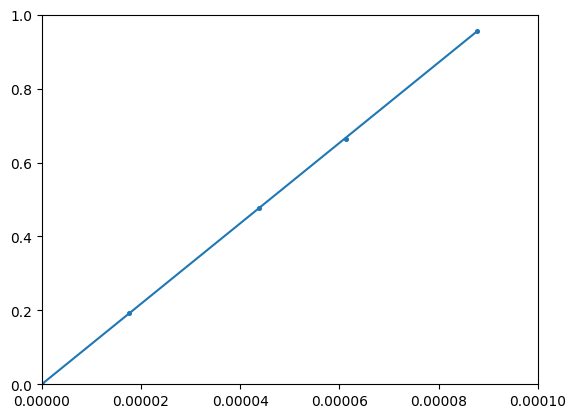

In [99]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import linear_model

conc = np.array([0,2,5,7,10]).reshape(-1,1) / 50e-3 * 4.384e-4 * 1e-3 
abs = np.array([0.004, 0.196, 0.482, 0.668, 0.960]).reshape(-1,1) - 0.004

model_calibration = linear_model.LinearRegression(fit_intercept=False).fit(abs, conc)
conc_pred = model_calibration.predict(abs)

plt.xlim(0, 1e-4)
plt.ylim(0,1)
plt.scatter(conc, abs, s=7)
plt.plot(conc_pred, abs)
print("coef =", model_calibration.coef_**-1, "\nscore =", model_calibration.score(abs, conc))

# 連続変化法

coef0 = [[0.95825516]] score0 = 0.9853653873748154
coef1 = [[-0.35662053]] score1 = 0.9725574583246336


array([[ 1.04356339, -1.        ],
       [-2.80410101, -1.        ]])

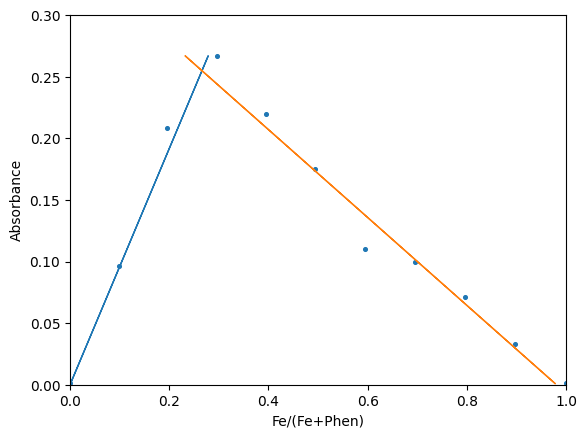

In [31]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import linear_model
from numpy.linalg import solve

# conc = np.array([0,1,2,3,4,5]).reshape(-1,1)
# abs = np.array([0,1,2,3,2,1]).reshape(-1,1)

conc_Fe = np.arange(11.0).reshape(-1,1) * 1e-3 * 4.936e-4 / 50e-3 
conc_Ph = np.arange(10,-1,-1).reshape(-1,1) * 1e-3 * 5e-4 * 1.0091  / 50e-3
conc = conc_Fe/(conc_Fe+conc_Ph)
abs = np.array([-0.003, 0.092, 0.204, 0.263, 0.216, 0.171, 0.106, 0.096, 0.067, 0.029, -0.003]).reshape(-1,1) - -0.004

model0 = linear_model.LinearRegression(fit_intercept=False).fit(abs[:4], conc[:4])
model1 = linear_model.LinearRegression().fit( abs[4:], conc[4:])
conc_pred_0 = model0.predict(abs)
conc_pred_1 = model1.predict(abs)

plt.xlim(0,1)
plt.ylim(0,0.3)
plt.xlabel("Fe/(Fe+Phen)")
plt.ylabel("Absorbance")
plt.scatter(conc,abs, s=7)
plt.plot(conc_pred_0,abs, lw=1)
plt.plot(conc_pred_1,abs, lw=1)
print("coef0 =", model0.coef_**-1, "score0 =", model0.score(abs[:4], conc[:4]))
print("coef1 =", model1.coef_**-1, "score1 =", model1.score(abs[4:], conc[4:]))

left = np.array([model0.coef_, [[-1]], model1.coef_, [[-1]]]).reshape(2,2)
# right = np.array([-model0.intercept_, -model1.intercept_])

# intersection_x, intersection_y = solve(left, right)
# print("intersection =",intersection_x,intersection_y)

model0.intercept_
left

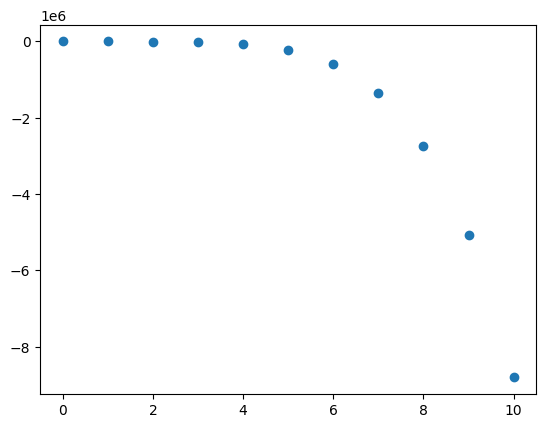

In [3]:
import numpy as np
import matplotlib.pyplot as plt 

a = 1
b = 1
c = b+a
m = 2
n = 3
K = 1

x = np.arange(11)
y = K*(a-m*x)**m * (c-a-n*x)**n

plt.scatter(x,y)